# STA 208: Homework 5

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


__Exercise 1__ Recall the adaboost algorithm for $y_i \in \{-1,1\}$...

1. Initialize the observed weights $w^{(1)}_i \gets 1/n$, $t \gets 1$.
1. For $t = 1,\ldots,T$
 1. Get a classifier $f_t(x) \in \{-1,1\}$
 1. Get the weighted error: $\epsilon_t = \sum_{i=1}^n w_i^{(t)} 1\{ f_t(x_i) \ne y_i \}$
 1. Let $\alpha_t \gets \log (\epsilon_t / (1 - \epsilon_t))$
 1. $w^{(t+1)}_i \gets w^{(t)}_i \exp ( -y_i f_t(x_i) \alpha_t )$ for all i.
 1. Let $Z_t \gets \sum_{i=1}^n w^{(t)}_i$, and $w^{(t+1)}_i \gets w_i^{(t+1)} / Z_t$ for all i.
1. Output the classifier: $$\hat y(x) = {\rm sign}\left( \sum_{t=1}^T \alpha_t f_t(x) \right)$$

We will demonstrate that the training error is bounded if each of these classifiers is a weak learner.  To this end, let $\epsilon_t = \frac 12 - \gamma_t$.  
If we can show that the training error is bounded by
$$ \prod_{t=1}^T \sqrt{2 \epsilon_t (1- \epsilon_t)} $$ then
we will see that the training error is bounded by
$$ \exp\left( - 2 \sum_{t=1}^T \gamma_t^2 \right) $$
because $\sqrt{2 \epsilon_t(1 - \epsilon_t)} \le \exp(2 \gamma_t^2)$.

__Exercise 1.1__ Demonstrate that 
$$ w^{(T+1)}_i = \frac 1n \frac{\exp(- y_i f(x_i))}{\prod_{t=1}^T Z_t}$$
where $f(x) = \sum_{t=1}^T \alpha_t f_t(x)$.

__Solution__

$W_{t+1}(i)=\frac{W_t(i)exp(-\alpha_ty_if_t(x_i))}{Z_t}$

Since $y_i$ and $f_t(x_i)$ are both in {-1,+1}.  

Now we have

$W_{T+1}(i)= T_1(i)\frac{exp(-\alpha_1y_if_1(x_i))}{Z_1}....\frac{exp(-\alpha_Ty_if_t(x_i))}{Z_T}$
$=\frac1N\frac{exp(-y_i\sum_t\alpha_tf_t(x_i))}{\prod_tZ_t}$
$=\frac1N\frac{exp(-y_if_t(x_i))}{\prod_tZ_t}$

__Exercise 1.2__ Using this, show that the training error, $\frac 1n \sum_{i=1}^n 1\{ y_i \ne \hat y(x_i)\}$ is bounded by $\prod_{t=1}^T Z_t$.  Hint: use the fact that $1\{ z < 0\} \le \exp(-z)$.

__Solution__

Training Error is: 

$H=\frac1N\sum_i\begin{cases}
1 & if \quad y_i\ne H(x_1)\\
0 & o/w
\end{cases}$

Since $H(x)=sign(f(x))$
 
$H=\frac1N\sum_i\begin{cases}
1 & if y_if(x_i)\le0  \\
0 & else y_1\in(-1,+1)
\end{cases}$

$\le\frac1N\sum_1D_{T+1}(i)\prod_tZ_t$  since $e^{-z}\le1$  if $z\le0$

$\sum_iD_{T+1}(i)\prod_tZ_t$  by step 1 above

$\prod_t^iZ_t$    since $D_T+1$ is a distribution



__Exercise 1.3__ Show that 
$$ Z_t = \sqrt{2 \epsilon_t (1 - \epsilon_t)}.$$

__Solution__
We have:
$ Z_t=\sum_i w_i^{(t)} \text{exp}(-y_i f_t(x_i) \alpha_t) = \sum_{f_t(x_i)=y_i} w_i^{(t)} \text{exp}(- \alpha_t) +  \sum_{f_t(x_i) \ne y_i} w_i^{(t)} \text{exp}(\alpha_t) = \text{exp}(- \alpha_t) \sum_{f_t(x_i)=y_i} w_i^{(t)}  + \text{exp}(\alpha_t)  \sum_{f_t(x_i) \ne y_i} w_i^{(t)}  
$
By the definition of $\epsilon_t$ the above becomes:
$
=\text{exp}(-\alpha_t) (1-\epsilon_t)+ \text{exp}(\alpha_t) \epsilon_t 
$
By plugging $\alpha_t$ in the above equation we get:
$
=2\sqrt{\epsilon_t(1-\epsilon_t)}.
$

## Bank Dataset
The following dataset can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Bank+Marketing">UCI ML repo</a>.

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_recall_curve

In [2]:
bank = pd.read_csv('bank/bank-full.csv',sep=";")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
X = bank.iloc[:,:-1]
y = bank['y']
y = (y == 'yes')*1
X = np.array(X)

In [5]:
from sklearn.preprocessing import OneHotEncoder

__Exercise 2.1__ (30 pts) Predict y from X using kernel SVMs, random forests, and adaboost (see the sklearn.ensembles package).  Tune the random forest using the out-of-bag error.  Tune everything else using cross-validation, and assess the models using a separate test set with ROC, PR, confusion matrices.  Write a paragraph about the relative performances of the algorithms and any observations that you've made.

In [8]:
plt.rcParams['figure.figsize'] = 6, 4

def plot_ROC(y_test, scores, label, color):
    """
    plots ROC curve
    input: y_test, scores, and title
    output: ROC curve
    """
    false_pr, true_pr, _ = roc_curve(y_test, scores[:, 1])
    roc_auc = auc(false_pr, true_pr)
    plt.plot(false_pr, true_pr, lw = 3,
             label='{}: area={:10.4f})'.format(label, roc_auc), color = color)
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc="best")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC')

def plot_PR(y_test, scores, label, color):
    """
    plots PR curve
    input: y_test, scores, title
    output: Precision-Recall curve
    """
    precision, recall, _ = precision_recall_curve(y_test, scores[:, 1])
    plt.plot(recall, precision,lw = 2,
             label='{}'.format(label), color = color)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    plt.legend(loc="best")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('PR')
    
def plot_confusionmatrix(ytrue, ypred):
    """
    
    plots confusion matrix heatmap and prints out
    classification report
    
    input: ytrue (actual value), ypred(predicted value)
    output: confusion matrix heatmap and classification report
    
    """
    
    print classification_report(ytrue, ypred)
    
    print '##################################################################'
    
    cnf_matrix = confusion_matrix(ytrue, ypred)
    sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot = True, linewidths=.5, fmt = '.4g')
    plt.title('Confusion matrix')
    plt.xlabel('Prediction')
    plt.ylabel('Actual');

In [9]:
X = bank.copy().drop('y', axis = 1)
Xnumerical = X.select_dtypes(include = ['int64'])
Xcategorical = X.select_dtypes(include = ['object'])

In [10]:
Xcategorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
month        45211 non-null object
poutcome     45211 non-null object
dtypes: object(9)
memory usage: 3.1+ MB


In [11]:
encoder = OneHotEncoder()
label_encoder = LabelEncoder()
Xcat_label_encoded = Xcategorical.apply(label_encoder.fit_transform)
Xcat_feature_one_hot_encoded = encoder.fit_transform(Xcat_label_encoded).toarray()
Xcat_feature_one_hot_encoded.shape

(45211, 44)

In [12]:
Xnumerical.shape

(45211, 7)

In [13]:
X = np.concatenate((Xnumerical, Xcat_feature_one_hot_encoded), axis = 1)
X.shape

(45211, 51)

__Set up training and test sets__

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .4, random_state = 42)

__SVMs__

In [181]:
kf_5 = cross_validation.KFold(xtrain.shape[0], n_folds= 5, shuffle = True, random_state = 7)
pipeline_svm = Pipeline([
    ('classifier', SVC(probability=True)),
])

param_svm = [
  {'classifier__C': [0.01, 1, 10], 
   'classifier__gamma': [0.01, 1, 10], 
   'classifier__kernel': ['rbf']},
]

grid_svm = GridSearchCV(
    pipeline_svm,
    param_grid=param_svm,  
    refit=True,  
    n_jobs=-1,  
    scoring='accuracy',  
    cv = kf_5
)

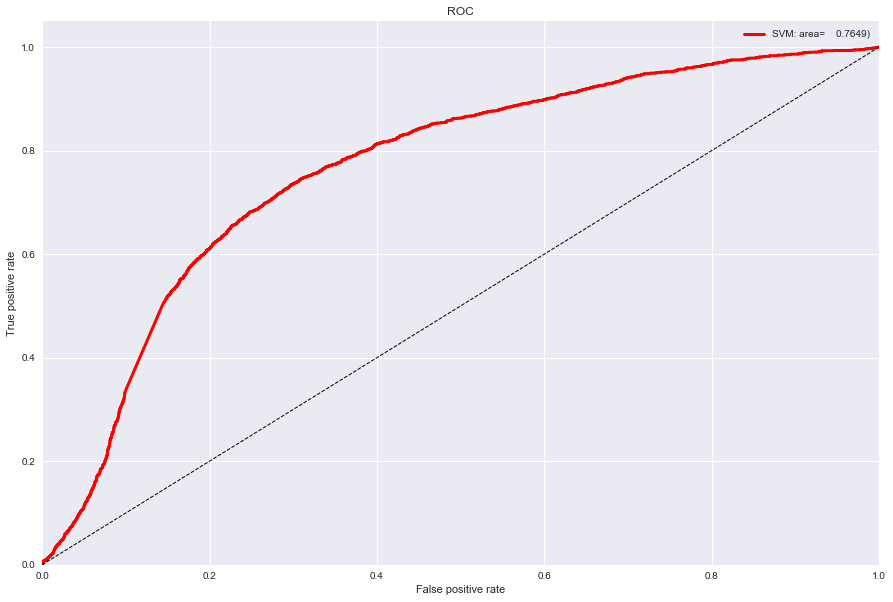

In [182]:
svm = grid_svm.fit(xtrain, ytrain)
svm_prob = svm.predict_proba(xtest)
svm_pred = svm.predict(xtest)

In [188]:
svm.best_params_

{'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

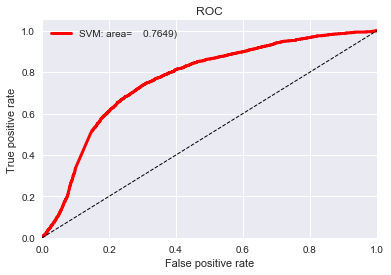

In [183]:
plot_ROC(ytest, svm_prob, 'SVM', 'red')

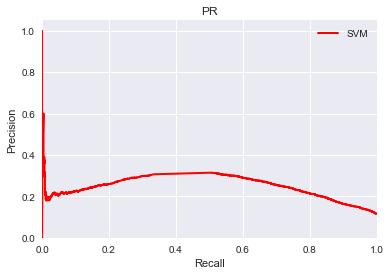

In [184]:
plot_PR(ytest, svm_prob, 'SVM', 'red')

             precision    recall  f1-score   support

          0       0.88      1.00      0.94     15984
          1       0.50      0.00      0.01      2101

avg / total       0.84      0.88      0.83     18085

##################################################################


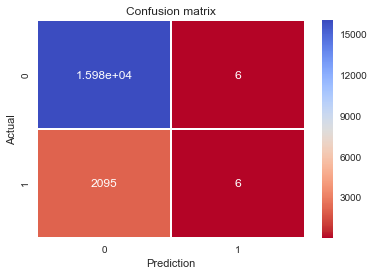

In [198]:
plot_confusionmatrix(ytest, svm_pred)

__Random Forest__

In [134]:
oobscores = {}
for n in [1, 10, 100, 200, 500, 1000, 2000, 5000]:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf.fit(xtrain, ytrain)
    oobscores[n] = rf.oob_score_

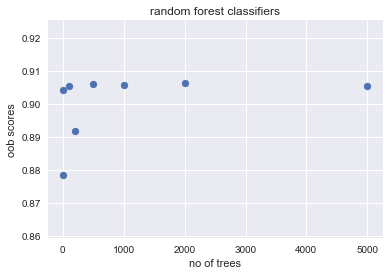

In [174]:
notrees = [1, 10, 100, 200, 500, 1000, 2000, 5000]
plt.scatter(notrees, oobscores.values())
plt.xlabel('no of trees')
plt.ylabel('oob scores')
plt.title('random forest classifiers');

Since there is not much improvement after 200 trees, I chose no_estimators = 200 for further investigation so that the code runs faster.

In [142]:
rf = RandomForestClassifier(n_estimators= 200, random_state=42, oob_score = True)
rf.fit(xtrain, ytrain)
rf_prob = rf.predict_proba(xtest)
rf_pred = rf.predict(xtest)

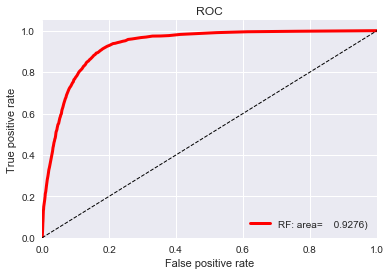

In [175]:
plt.figure(figsize=(6, 4))
plot_ROC(ytest, rf_prob, 'RF', 'red')

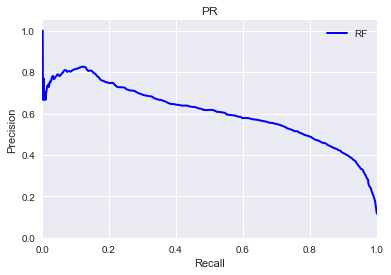

In [176]:
plt.figure(figsize=(6, 4))
plot_PR(ytest, rf_prob, 'RF', 'blue')

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     15984
          1       0.64      0.41      0.50      2101

avg / total       0.89      0.90      0.90     18085

##################################################################


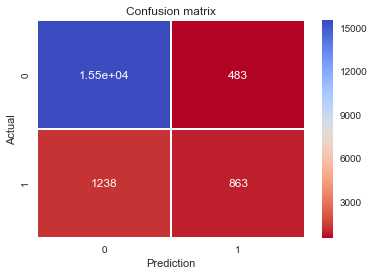

In [177]:
plot_confusionmatrix(ytest, rf_pred)

__Adaboost__

In [159]:
adaboost = AdaBoostClassifier()
parameters = {'n_estimators' : [20, 50]}
ada = GridSearchCV(adaboost,
                  parameters,
                  cv = kf_5,
                  refit = True,
                  n_jobs = -1,
                  scoring = 'accuracy')

In [160]:
adaclf = ada.fit(xtrain, ytrain)

In [166]:
ada_prob = ada.predict_proba(xtest)
ada_pred = ada.predict(xtest)

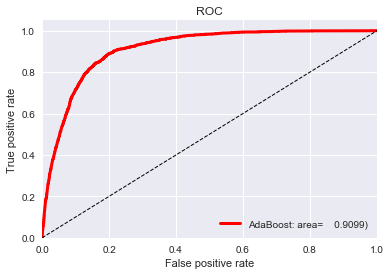

In [178]:
plt.figure(figsize=(6, 4))
plot_ROC(ytest, ada_prob, 'AdaBoost', 'red')

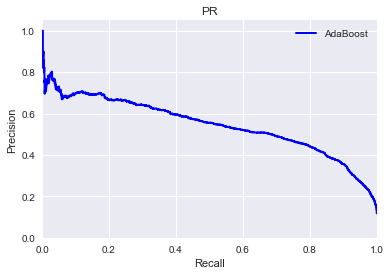

In [179]:
plt.figure(figsize=(6, 4))
plot_PR(ytest, ada_prob, 'AdaBoost', 'blue')

             precision    recall  f1-score   support

          0       0.92      0.97      0.94     15984
          1       0.60      0.38      0.47      2101

avg / total       0.89      0.90      0.89     18085

##################################################################


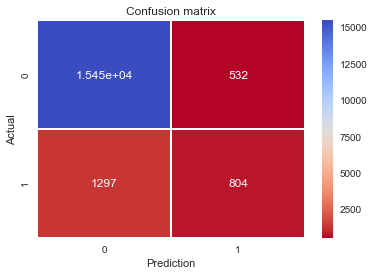

In [180]:
plot_confusionmatrix(ytest, ada_pred)

__Discussion of Results__

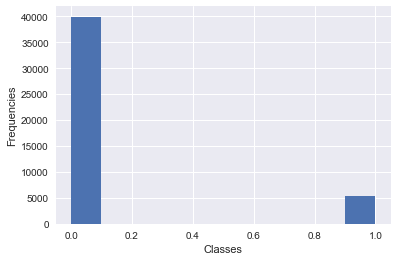

In [197]:
plt.hist(y)
plt.xlabel('Classes')
plt.ylabel('Frequencies');

We can see from the histogram above that the data is unbalanced. Since the "0" class is so much larger than the "1" class, the accuracy metric and ROC curves are not a reliable approach. Instead we use the recall metric and PR curves to assess the SVMs, Random Forest, and Adaboost algorithms.  

We find that the Random Forest classifier has the best performance, with ROC area 0.927, recall of 0.41, and precision of 0.64. It's PR curve is slightly better than the AdaBoost's PR curve.  

Adaboost performs better than SVM with ROC area of 0.9099. However, the PR curve doesn't look good and according to the confusion matrix only 804 out of 2101 true "1" class was found, which coincides with the poor recall of 0.38 and precision 0.60.  

The SVM with rbf kernel, C=1, and gamma = 0.01 performs the worst with ROC area of 0.7649. The PR curve looks pretty bad, and the confusion matrix shows us that only 6 of the 2101 actual "1" class were correctly classified, which aligns with the recall of 0. This poor perfomance is due to the unbalanced data. 

__Exercise 2.2__ (Bonus: 20 pts) Using theano, code online stochastic gradient method for logistic regression with a single hidden layer with three units that uses the sigmoid activation function.  Compare the test error to the previous methods.

You can use the code here: http://deeplearning.net/tutorial/mlp.html

You may want to use the onehotencoder to encode the categorical variables in X.

In [15]:
import theano
import theano.tensor as T

In [16]:
y = np.array(y, dtype=np.int32)

In [17]:
set_x, test_set_x, set_y, test_set_y = train_test_split(X, y, test_size = .25, random_state = 42)
train_set_x, valid_set_x, train_set_y, valid_set_y = train_test_split(set_x, set_y, test_size = .25, random_state = 42)

In [36]:
"""
This tutorial introduces the multilayer perceptron using Theano.

 A multilayer perceptron is a logistic regressor where
instead of feeding the input to the logistic regression you insert a
intermediate layer, called the hidden layer, that has a nonlinear
activation function (usually tanh or sigmoid) . One can use many such
hidden layers making the architecture deep. The tutorial will also tackle
the problem of MNIST digit classification.

.. math::

    f(x) = G( b^{(2)} + W^{(2)}( s( b^{(1)} + W^{(1)} x))),

References:

    - textbooks: "Pattern Recognition and Machine Learning" -
                 Christopher M. Bishop, section 5

"""

#from __future__ import print_function

#__docformat__ = 'restructedtext en'


import os
import sys
import timeit

import numpy

import theano
import theano.tensor as T


class LogisticRegression(object):
    """Multi-class Logistic Regression Class

    The logistic regression is fully described by a weight matrix :math:`W`
    and bias vector :math:`b`. Classification is done by projecting data
    points onto a set of hyperplanes, the distance to which is used to
    determine a class membership probability.
    """

    def __init__(self, input, n_in, n_out):
        """ Initialize the parameters of the logistic regression

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes the input of the
                      architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space in
                     which the datapoints lie

        :type n_out: int
        :param n_out: number of output units, the dimension of the space in
                      which the labels lie

        """
        # start-snippet-1
        # initialize with 0 the weights W as a matrix of shape (n_in, n_out)
        self.W = theano.shared(
            value=numpy.zeros(
                (n_in, n_out),
                dtype=theano.config.floatX
            ),
            name='W',
            borrow=True
        )
        # initialize the biases b as a vector of n_out 0s
        self.b = theano.shared(
            value=numpy.zeros(
                (n_out,),
                dtype=theano.config.floatX
            ),
            name='b',
            borrow=True
        )

        # symbolic expression for computing the matrix of class-membership
        # probabilities
        # Where:
        # W is a matrix where column-k represent the separation hyperplane for
        # class-k
        # x is a matrix where row-j  represents input training sample-j
        # b is a vector where element-k represent the free parameter of
        # hyperplane-k
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)

        # symbolic description of how to compute prediction as class whose
        # probability is maximal
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)
        # end-snippet-1

        # parameters of the model
        self.params = [self.W, self.b]

        # keep track of model input
        self.input = input

    def negative_log_likelihood(self, y):
        """Return the mean of the negative log-likelihood of the prediction
        of this model under a given target distribution.

        .. math::

            \frac{1}{|\mathcal{D}|} \mathcal{L} (\theta=\{W,b\}, \mathcal{D}) =
            \frac{1}{|\mathcal{D}|} \sum_{i=0}^{|\mathcal{D}|}
                \log(P(Y=y^{(i)}|x^{(i)}, W,b)) \\
            \ell (\theta=\{W,b\}, \mathcal{D})

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example the
                  correct label

        Note: we use the mean instead of the sum so that
              the learning rate is less dependent on the batch size
        """
        # start-snippet-2
        # y.shape[0] is (symbolically) the number of rows in y, i.e.,
        # number of examples (call it n) in the minibatch
        # T.arange(y.shape[0]) is a symbolic vector which will contain
        # [0,1,2,... n-1] T.log(self.p_y_given_x) is a matrix of
        # Log-Probabilities (call it LP) with one row per example and
        # one column per class LP[T.arange(y.shape[0]),y] is a vector
        # v containing [LP[0,y[0]], LP[1,y[1]], LP[2,y[2]], ...,
        # LP[n-1,y[n-1]]] and T.mean(LP[T.arange(y.shape[0]),y]) is
        # the mean (across minibatch examples) of the elements in v,
        # i.e., the mean log-likelihood across the minibatch.
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])
        # end-snippet-2

    def errors(self, y):
        """Return a float representing the number of errors in the minibatch
        over the total number of examples of the minibatch ; zero one
        loss over the size of the minibatch

        :type y: theano.tensor.TensorType
        :param y: corresponds to a vector that gives for each example the
                  correct label
        """

        # check if y has same dimension of y_pred
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        # check if y is of the correct datatype
        if y.dtype.startswith('int'):
            # the T.neq operator returns a vector of 0s and 1s, where 1
            # represents a mistake in prediction
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()


# start-snippet-1
class HiddenLayer(object):
    def __init__(self, rng, input, n_in, n_out, W=None, b=None,
                 activation=T.tanh):
        """
        Typical hidden layer of a MLP: units are fully-connected and have
        sigmoidal activation function. Weight matrix W is of shape (n_in,n_out)
        and the bias vector b is of shape (n_out,).

        NOTE : The nonlinearity used here is tanh

        Hidden unit activation is given by: tanh(dot(input,W) + b)

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.dmatrix
        :param input: a symbolic tensor of shape (n_examples, n_in)

        :type n_in: int
        :param n_in: dimensionality of input

        :type n_out: int
        :param n_out: number of hidden units

        :type activation: theano.Op or function
        :param activation: Non linearity to be applied in the hidden
                           layer
        """
        self.input = input
        # end-snippet-1

        # `W` is initialized with `W_values` which is uniformely sampled
        # from sqrt(-6./(n_in+n_hidden)) and sqrt(6./(n_in+n_hidden))
        # for tanh activation function
        # the output of uniform if converted using asarray to dtype
        # theano.config.floatX so that the code is runable on GPU
        # Note : optimal initialization of weights is dependent on the
        #        activation function used (among other things).
        #        For example, results presented in [Xavier10] suggest that you
        #        should use 4 times larger initial weights for sigmoid
        #        compared to tanh
        #        We have no info for other function, so we use the same as
        #        tanh.
        if W is None:
            W_values = numpy.asarray(
                rng.uniform(
                    low=-numpy.sqrt(6. / (n_in + n_out)),
                    high=numpy.sqrt(6. / (n_in + n_out)),
                    size=(n_in, n_out)
                ),
                dtype=theano.config.floatX
            )
            if activation == theano.tensor.nnet.sigmoid:
                W_values *= 4

            W = theano.shared(value=W_values, name='W', borrow=True)

        if b is None:
            b_values = numpy.zeros((n_out,), dtype=theano.config.floatX)
            b = theano.shared(value=b_values, name='b', borrow=True)

        self.W = W
        self.b = b

        lin_output = T.dot(input, self.W) + self.b
        self.output = (
            lin_output if activation is None
            else activation(lin_output)
        )
        # parameters of the model
        self.params = [self.W, self.b]


# start-snippet-2
class MLP(object):
    """Multi-Layer Perceptron Class

    A multilayer perceptron is a feedforward artificial neural network model
    that has one layer or more of hidden units and nonlinear activations.
    Intermediate layers usually have as activation function tanh or the
    sigmoid function (defined here by a ``HiddenLayer`` class)  while the
    top layer is a softmax layer (defined here by a ``LogisticRegression``
    class).
    """

    def __init__(self, rng, input, n_in, n_hidden, n_out):
        """Initialize the parameters for the multilayer perceptron

        :type rng: numpy.random.RandomState
        :param rng: a random number generator used to initialize weights

        :type input: theano.tensor.TensorType
        :param input: symbolic variable that describes the input of the
        architecture (one minibatch)

        :type n_in: int
        :param n_in: number of input units, the dimension of the space in
        which the datapoints lie

        :type n_hidden: int
        :param n_hidden: number of hidden units

        :type n_out: int
        :param n_out: number of output units, the dimension of the space in
        which the labels lie

        """

        # Since we are dealing with a one hidden layer MLP, this will translate
        # into a HiddenLayer with a tanh activation function connected to the
        # LogisticRegression layer; the activation function can be replaced by
        # sigmoid or any other nonlinear function
        self.hiddenLayer = HiddenLayer(
            rng=rng,
            input=input,
            n_in=n_in,
            n_out=n_hidden,
            activation=T.tanh
        )

        # The logistic regression layer gets as input the hidden units
        # of the hidden layer
        self.logRegressionLayer = LogisticRegression(
            input=self.hiddenLayer.output,
            n_in=n_hidden,
            n_out=n_out
        )
        # end-snippet-2 start-snippet-3
        # L1 norm ; one regularization option is to enforce L1 norm to
        # be small
        self.L1 = (
            abs(self.hiddenLayer.W).sum()
            + abs(self.logRegressionLayer.W).sum()
        )

        # square of L2 norm ; one regularization option is to enforce
        # square of L2 norm to be small
        self.L2_sqr = (
            (self.hiddenLayer.W ** 2).sum()
            + (self.logRegressionLayer.W ** 2).sum()
        )

        # negative log likelihood of the MLP is given by the negative
        # log likelihood of the output of the model, computed in the
        # logistic regression layer
        self.negative_log_likelihood = (
            self.logRegressionLayer.negative_log_likelihood
        )
        # same holds for the function computing the number of errors
        self.errors = self.logRegressionLayer.errors

        # the parameters of the model are the parameters of the two layer it is
        # made out of
        self.params = self.hiddenLayer.params + self.logRegressionLayer.params
        # end-snippet-3

        # keep track of model input
        self.input = input


def test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=10, n_hidden=3):
    """
    Demonstrate stochastic gradient descent optimization for a multilayer
    perceptron

    This is demonstrated on MNIST.

    :type learning_rate: float
    :param learning_rate: learning rate used (factor for the stochastic
    gradient

    :type L1_reg: float
    :param L1_reg: L1-norm's weight when added to the cost (see
    regularization)

    :type L2_reg: float
    :param L2_reg: L2-norm's weight when added to the cost (see
    regularization)

    :type n_epochs: int
    :param n_epochs: maximal number of epochs to run the optimizer

    :type dataset: string
    :param dataset: the path of the MNIST dataset file from
                 http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz


   """
    #xtrain, xtest, ytrain, ytest

    #train_set_x, train_set_y = xtrain, ytrain
    #valid_set_x, valid_set_y = datasets[1]
    #test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.shape[0] // batch_size
    n_valid_batches = valid_set_x.shape[0] // batch_size
    n_test_batches = test_set_x.shape[0] // batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    print('... building the model')

    # allocate symbolic variables for the data
    index = T.lscalar()  # index to a [mini]batch
    x = T.matrix('x')  # the data is presented as rasterized images
    y = T.ivector('y')  # the labels are presented as 1D vector of
                        # [int] labels

    rng = numpy.random.RandomState(1234)

    # construct the MLP class
    classifier = MLP(
        rng=rng,
        input=x,
        n_in=51,
        n_hidden=n_hidden,
        n_out=2
    )

    # start-snippet-4
    # the cost we minimize during training is the negative log likelihood of
    # the model plus the regularization terms (L1 and L2); cost is expressed
    # here symbolically
    cost = (
        classifier.negative_log_likelihood(y)
        + L1_reg * classifier.L1
        + L2_reg * classifier.L2_sqr
    )
    # end-snippet-4

    # compiling a Theano function that computes the mistakes that are made
    # by the model on a minibatch
    test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: theano.shared(test_set_x)[index * batch_size:(index + 1) * batch_size],
            y: theano.shared(test_set_y)[index * batch_size:(index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: theano.shared(valid_set_x)[index * batch_size:(index + 1) * batch_size],
            y: theano.shared(valid_set_y)[index * batch_size:(index + 1) * batch_size]
        }
    )

    # start-snippet-5
    # compute the gradient of cost with respect to theta (sorted in params)
    # the resulting gradients will be stored in a list gparams
    gparams = [T.grad(cost, param) for param in classifier.params]

    # specify how to update the parameters of the model as a list of
    # (variable, update expression) pairs

    # given two lists of the same length, A = [a1, a2, a3, a4] and
    # B = [b1, b2, b3, b4], zip generates a list C of same size, where each
    # element is a pair formed from the two lists :
    #    C = [(a1, b1), (a2, b2), (a3, b3), (a4, b4)]
    updates = [
        (param, param - learning_rate * gparam)
        for param, gparam in zip(classifier.params, gparams)
    ]

    # compiling a Theano function `train_model` that returns the cost, but
    # in the same time updates the parameter of the model based on the rules
    # defined in `updates`
    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: theano.shared(train_set_x)[index * batch_size: (index + 1) * batch_size],
            y: theano.shared(train_set_y)[index * batch_size: (index + 1) * batch_size]
        }
    )
    # end-snippet-5

    ###############
    # TRAIN MODEL #
    ###############
    print('... training')

    # early-stopping parameters
    patience = 100000  # look as this many examples regardless
    patience_increase = 2  # wait this much longer when a new best is
                           # found
    improvement_threshold = 0.995  # a relative improvement of this much is
                                   # considered significant
    validation_frequency = min(n_train_batches, patience // 2)
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

    best_validation_loss = numpy.inf
    best_iter = 0
    test_score = 0.
    #start_time = timeit.default_timer()

    epoch = 0
    done_looping = False

    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            minibatch_avg_cost = train_model(minibatch_index)
            # iteration number
            iter = (epoch - 1) * n_train_batches + minibatch_index

            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) for i
                                     in range(n_valid_batches)]
                this_validation_loss = numpy.mean(validation_losses)

                print(
                    'epoch %i, minibatch %i/%i, validation error %f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:
                    #improve patience if loss improvement is good enough
                    if (
                        this_validation_loss < best_validation_loss *
                        improvement_threshold
                    ):
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    best_iter = iter

                    # test it on the test set
                    test_losses = [test_model(i) for i
                                   in range(n_test_batches)]
                    test_score = numpy.mean(test_losses)

                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                           test_score * 100.))

            if patience <= iter:
                done_looping = True
                break

    #end_time = timeit.default_timer()
    print(('Optimization complete. Best validation score of %f %% '
           'obtained at iteration %i, with test performance %f %%') %
          (best_validation_loss * 100., best_iter + 1, test_score * 100.))

In [37]:
test_mlp()

... building the model
... training
epoch 1, minibatch 2543/2543, validation error 11.487603 %
     epoch 1, minibatch 2543/2543, test error of best model 11.955752 %
epoch 2, minibatch 2543/2543, validation error 11.487603 %
epoch 3, minibatch 2543/2543, validation error 11.487603 %
epoch 4, minibatch 2543/2543, validation error 11.487603 %
epoch 5, minibatch 2543/2543, validation error 11.487603 %
epoch 6, minibatch 2543/2543, validation error 11.487603 %
epoch 7, minibatch 2543/2543, validation error 11.487603 %
epoch 8, minibatch 2543/2543, validation error 11.487603 %
epoch 9, minibatch 2543/2543, validation error 11.487603 %
epoch 10, minibatch 2543/2543, validation error 11.487603 %
epoch 11, minibatch 2543/2543, validation error 11.487603 %
epoch 12, minibatch 2543/2543, validation error 11.487603 %
epoch 13, minibatch 2543/2543, validation error 11.487603 %
epoch 14, minibatch 2543/2543, validation error 11.487603 %
epoch 15, minibatch 2543/2543, validation error 11.487603 %
e

The accuracy of the online stochastic gradient method for logistic regression with a single hidden layer with three units that uses the sigmoid activation function is **100 - 11.49 = 88.51%** which is a little larger than SVC, and a little smaller than those of ensemble methods. Here is the summary of accuracies:

| Method | Accuracy (in %) |
| ------ | ----------- |
| Support Vector Machines   | 80 |
| Random Forest | 90 |
| AdaBoost     | 90  |
| Neural Net| 88.51  |